In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
import os
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/Covid19-dataset/train'
test_path = '/content/drive/MyDrive/Covid19-dataset/test'
img_classes = os.listdir('/content/drive/MyDrive/Covid19-dataset/test')
print(f"Classes: {img_classes}")


Classes: ['Covid', 'Viral Pneumonia', 'Normal']


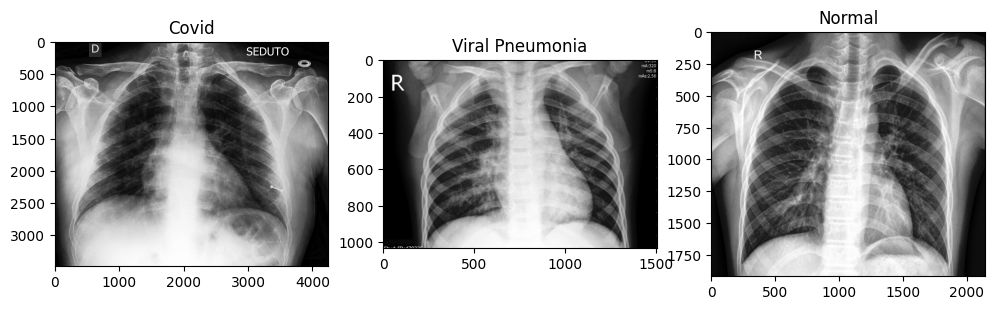

In [4]:
def plot_image(img_classes):
  plt.figure(figsize=(12, 12))
  for i, kind in enumerate(img_classes):
    img_path = train_path + '/' + kind
    image_in_folder = os.listdir(img_path)

    first_img = image_in_folder[0]
    first_img_path = img_path + '/' + first_img

    img = image.load_img(first_img_path)
    img_array = image.img_to_array(img)/255

    plt.subplot(1,3,i+1)
    plt.imshow(img_array)
    plt.title(kind)
plot_image(img_classes)

In [5]:
data_generator = ImageDataGenerator(rescale=1/255)

In [7]:
train_data = data_generator.flow_from_directory(train_path, target_size=(224,224),batch_size=10)

Found 251 images belonging to 3 classes.


In [8]:
test_data = data_generator.flow_from_directory(test_path, target_size=(224,224),batch_size=10)

Found 66 images belonging to 3 classes.


In [12]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=3,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,946,883 (49.39 MB)

 Trainable params: 12,946,883 (49.39 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_history = model.fit(train_data,epochs=10,validation_data=test_data)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 125s 4s/step - accuracy: 0.4863 - loss: 1.3842 - val_accuracy: 0.6818 - val_loss: 0.7066
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8862 - loss: 0.3424 - val_accuracy: 0.6818 - val_loss: 1.1221
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.9176 - loss: 0.2963 - val_accuracy: 0.9242 - val_loss: 0.2956
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9874 - loss: 0.0643 - val_accuracy: 0.8182 - val_loss: 0.4027
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9699 - loss: 0.0769 - val_accuracy: 0.8636 - val_loss: 0.4034
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - accuracy: 0.9844 - loss: 0.0346 - val_accuracy: 0.9091 - val_loss: 0.2502
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 1.0000 - loss: 0.0178 - val_accuracy: 0.9394 - val_loss: 0.5650
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9242 - val_loss

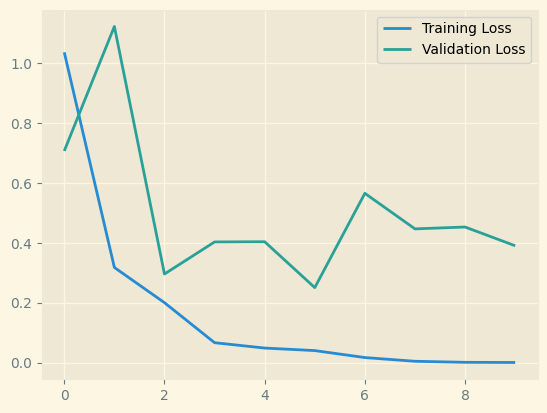

In [15]:
plt.style.use('Solarize_Light2')
plt.plot(model_history.history['loss'],label='Training Loss')
plt.plot(model_history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

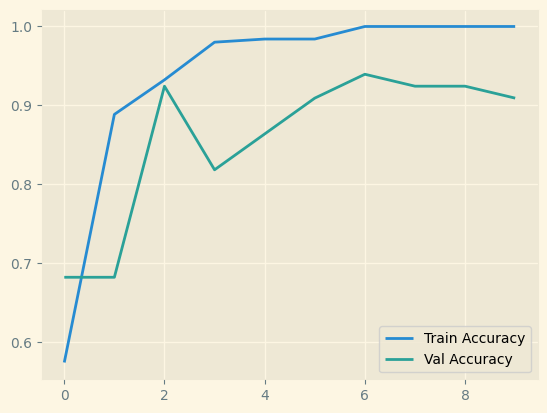

In [16]:
plt.style.use('Solarize_Light2')
plt.plot(model_history.history['accuracy'] , label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'] , label='Val Accuracy')
plt.legend()
plt.show()

In [17]:
model.evaluate(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.9494 - loss: 0.1683


[0.38994258642196655, 0.9090909361839294]

**Transfer Learning**


In [18]:
from tensorflow.keras.applications.vgg19 import VGG19

vgg19_model = VGG19()
vgg19_model.summary()


574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
vgg19_layers = vgg19_model.layers
for i in vgg19_layers:
  print(i)

<InputLayer name=input_layer_2, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<Conv2D name=block3_conv4, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<Conv2D name=block4_conv4, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<Conv2D name=block5_conv4, built=True>
<MaxPooling2D name=block5_pool, built=True>
<Flatten name=flatten, built=True>
<Dense name=fc1, built=True>
<Dense name=fc2, built=True>
<Dense name=predict

In [23]:
vgg19_model = Sequential()
for i in range(len(vgg19_layers)-1):
    vgg19_model.add(vgg19_layers[i])

for layers in vgg19_model.layers:
  layers.trainable = False

vgg19_model.add(Dense(3, activation = 'softmax'))
vgg19_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 139,582,531 (532.47 MB)

 Trainable params: 12,291 (48.01 KB)

 Non-trainable params: 139,570,240 (532.42 MB)

In [24]:
vgg19_model.compile(optimizer = 'adam',
                   loss = 'categorical_crossentropy',
                   metrics = ['accuracy'])
model_history = vgg19_model.fit(train_data,
                               epochs = 5,
                               validation_data = test_data)

Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 264s 10s/step - accuracy: 0.4384 - loss: 1.2057 - val_accuracy: 0.3485 - val_loss: 1.0076
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 259s 10s/step - accuracy: 0.6724 - loss: 0.7980 - val_accuracy: 0.8333 - val_loss: 0.5530
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 291s 11s/step - accuracy: 0.8376 - loss: 0.5480 - val_accuracy: 0.5909 - val_loss: 0.8187
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 258s 10s/step - accuracy: 0.7584 - loss: 0.5589 - val_accuracy: 0.7879 - val_loss: 0.4826
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 259s 10s/step - accuracy: 0.7317 - loss: 0.5710 - val_accuracy: 0.8182 - val_loss: 0.4774


In [26]:
model = VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False
new_model = Sequential()
new_model.add(model)
new_model.add(Flatten())
new_model.add(Dense(units=128,activation='relu'))
new_model.add(Dense(units=64,activation='relu'))
new_model.add(Dense(units=3,activation='softmax'))


new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model_history = new_model.fit(train_data,epochs=7,validation_data=test_data)

Epoch 1/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 261s 10s/step - accuracy: 0.6144 - loss: 1.4163 - val_accuracy: 0.9091 - val_loss: 0.2653
Epoch 2/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 255s 10s/step - accuracy: 0.9349 - loss: 0.1875 - val_accuracy: 0.8939 - val_loss: 0.1948
Epoch 3/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 257s 10s/step - accuracy: 0.9783 - loss: 0.0891 - val_accuracy: 0.9697 - val_loss: 0.0914
Epoch 4/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 255s 10s/step - accuracy: 0.9920 - loss: 0.0263 - val_accuracy: 0.9545 - val_loss: 0.1035
Epoch 5/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 255s 10s/step - accuracy: 0.9963 - loss: 0.0170 - val_accuracy: 0.9545 - val_loss: 0.0978
Epoch 6/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 292s 11s/step - accuracy: 1.0000 - loss: 0.0076 - val_accuracy: 0.9545 - val_loss: 0.1115
Epoch 7/7
26/26 ━━━━━━━━━━━━━━━━━━━━ 292s 10s/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9545 - val_loss: 0.1048
